In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as an
import sklearn.metrics
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
#adata=sc.read(results_file_post)
#adata.uns['log1p'] = {"base":None}

In [4]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.
scanpy==1.9.3 anndata==0.10.7 umap==0.5.5 numpy==1.26.4 scipy==1.13.0 pandas==2.2.2 scikit-learn==1.4.2 statsmodels==0.14.1 python-igraph==0.10.4 pynndescent==0.5.12


In [5]:
#%matplotlib inline

In [6]:
writeDir = "write/"

fileName = "Ayyaz_intestine"

resultsFileQC = writeDir + fileName + '_QC.h5ad' 


In [7]:
sc.set_figure_params(scanpy=True, dpi=100, dpi_save=150, fontsize=10, format='png')
sc.settings.figdir = "figures/" + fileName + "/"
figName = fileName

# Read In Data

In [8]:
inDir = f'data/regenData/'
inputFile = f'{inDir}/intestRegenAyyaz.csv'
#inMetaFile = f'{inDir}/Meta-data.csv'

In [15]:
adata = sc.read_csv(inputFile).T
adata

AnnData object with n_obs × n_vars = 192 × 32196

In [16]:
adata.var_names_make_unique()
adata.obs_names_make_unique()

In [17]:
adata.obs 

""
A01__Plate3
A01__Plate4
A02__Plate3
A02__Plate4
A03__Plate3
...
H10__Plate4
H11__Plate3
H11__Plate4
H12__Plate3


In [18]:
adata.var

""
0610009B22Rik
0610009E02Rik
0610009L18Rik
0610010F05Rik
0610010K14Rik
...
Zxdb
Zxdc
Zyx
Zzef1


In [19]:
#adata = adata[adata.obs.cell_type=="Malignant"]
adata

AnnData object with n_obs × n_vars = 192 × 32196

# QC

normalizing counts per cell
    finished (0:00:00)


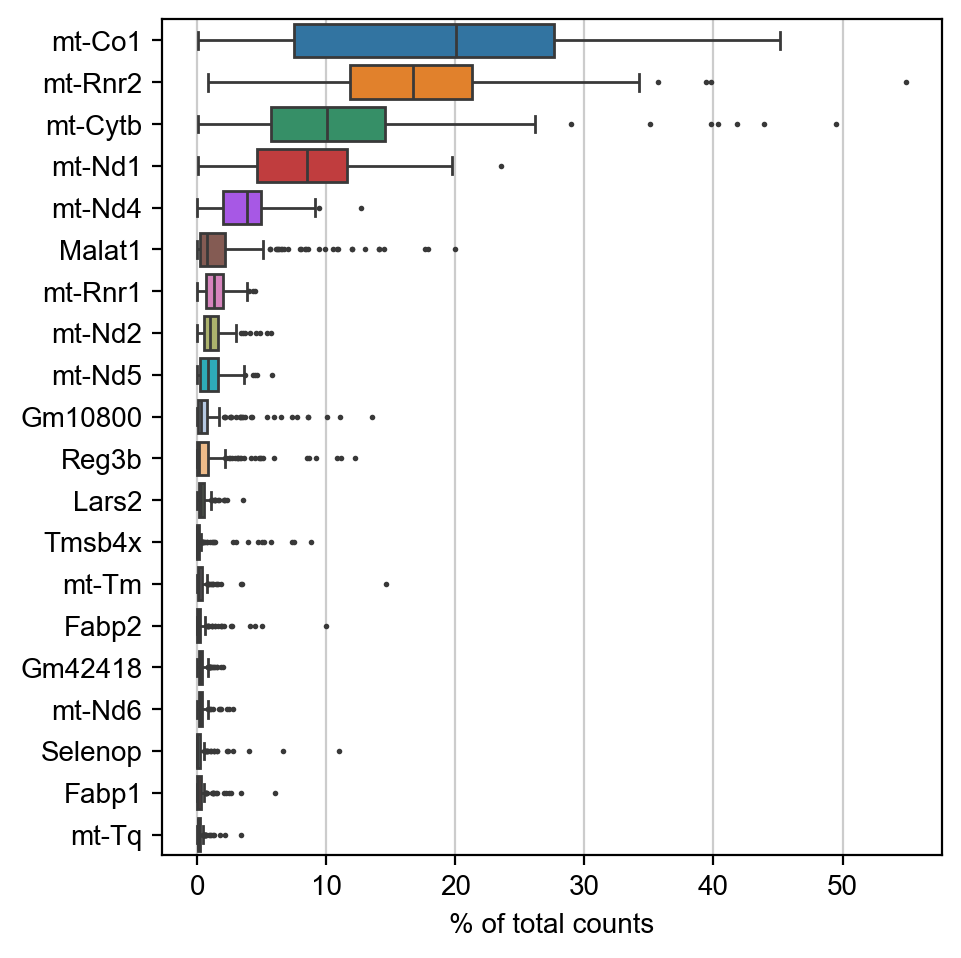

In [20]:
sc.pl.highest_expr_genes(adata, n_top=20, )

/tmp/ipykernel_174292/2071889784.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


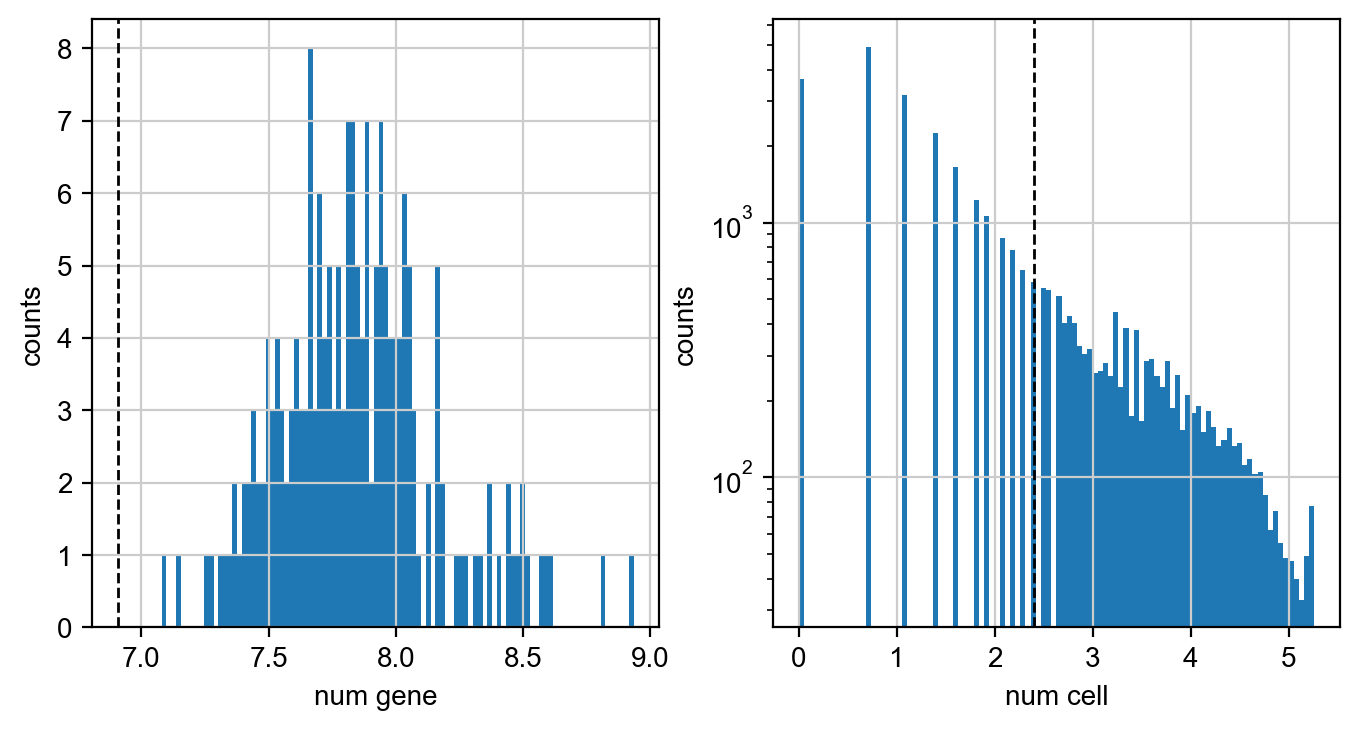

In [24]:
valX = adata.X>0
minGenes=1000
minCells=10

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

numCellwExp = valX.sum(axis=1)
axs[0].hist(np.log(numCellwExp), bins=100)#, log=True)
axs[0].axvline(np.log(minGenes), color='k', linestyle='dashed', linewidth=1)
axs[0].set_xlabel('num gene')
axs[0].set_ylabel('counts')

numGeneswExp = valX.sum(axis=0).T
axs[1].hist(np.log(numGeneswExp+1), bins=100, log=True)
axs[1].axvline(np.log(minCells+1), color='k', linestyle='dashed', linewidth=1)
#axs[0,1].axvline(np.log(600), color='k', linestyle='dashed', linewidth=1)
#axs[0,1].axvline(np.log(4000), color='k', linestyle='dashed', linewidth=1)
#axs[0,1].set_title('Gene means counts')
axs[1].set_xlabel('num cell')
axs[1].set_ylabel('counts')

fig.show()

In [25]:
sc.pp.filter_cells(adata, min_genes = minGenes)
sc.pp.filter_genes(adata, min_cells = minCells)

filtered out 20263 genes that are detected in less than 10 cells


In [27]:
adata = adata[:,np.logical_not(adata.var_names=="Malat1")]

## Mito QC

In [28]:
for g in adata.var_names:
    if "MT-" == g[:2]:
        print(g)

In [29]:
adata.var['mt'] = adata.var_names.str.startswith('mt-') 
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], log1p = False, inplace=True)

/tmp/ipykernel_174292/3426326396.py:1: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['mt'] = adata.var_names.str.startswith('mt-')


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


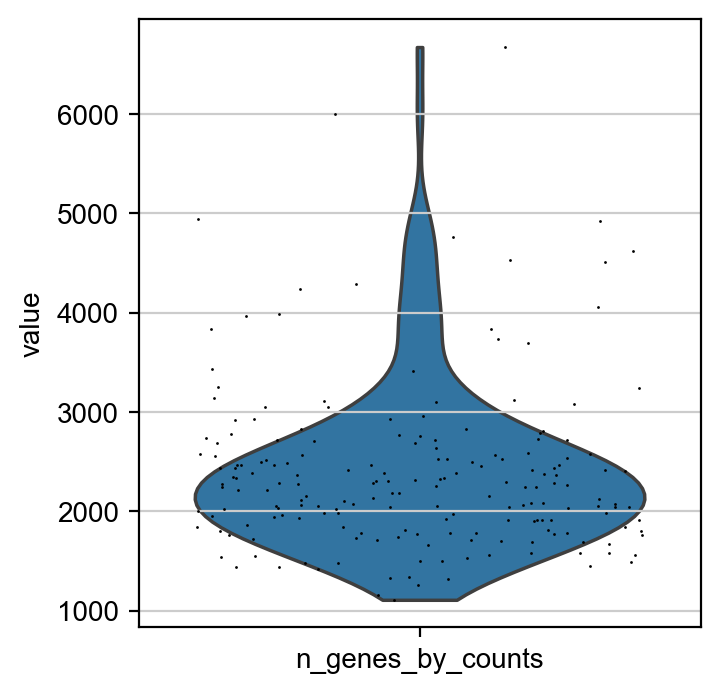

In [30]:
sc.pl.violin(adata, ['n_genes_by_counts'], jitter=0.4)

/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


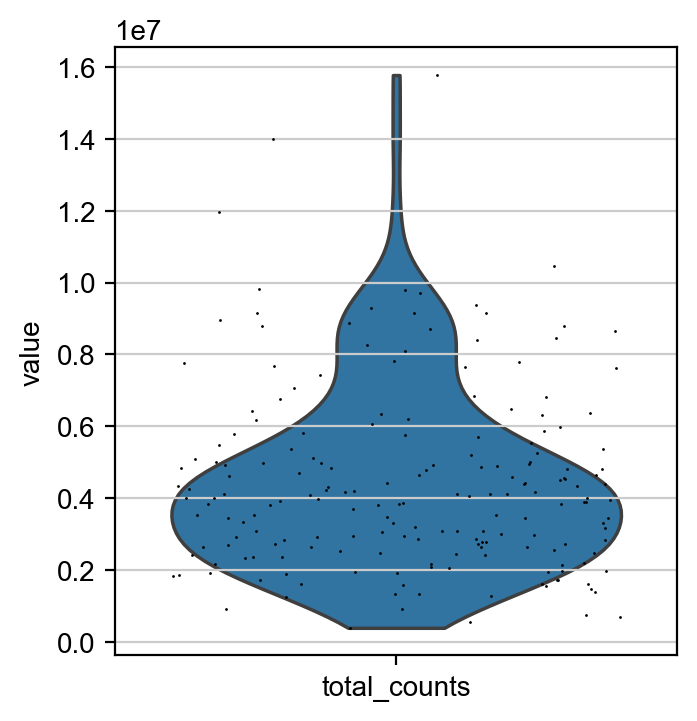

In [31]:
sc.pl.violin(adata, ['total_counts'], jitter=0.4)

/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


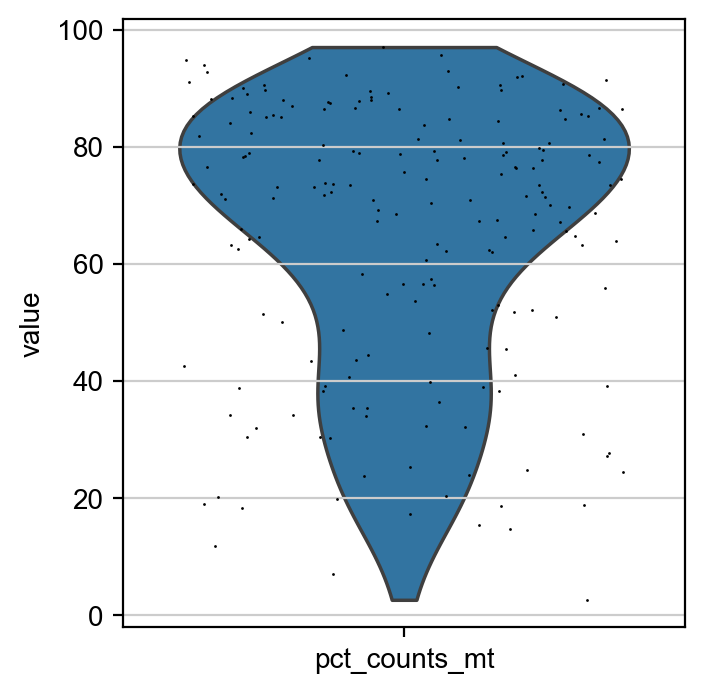

In [32]:
sc.pl.violin(adata, ['pct_counts_mt'], jitter=0.4)

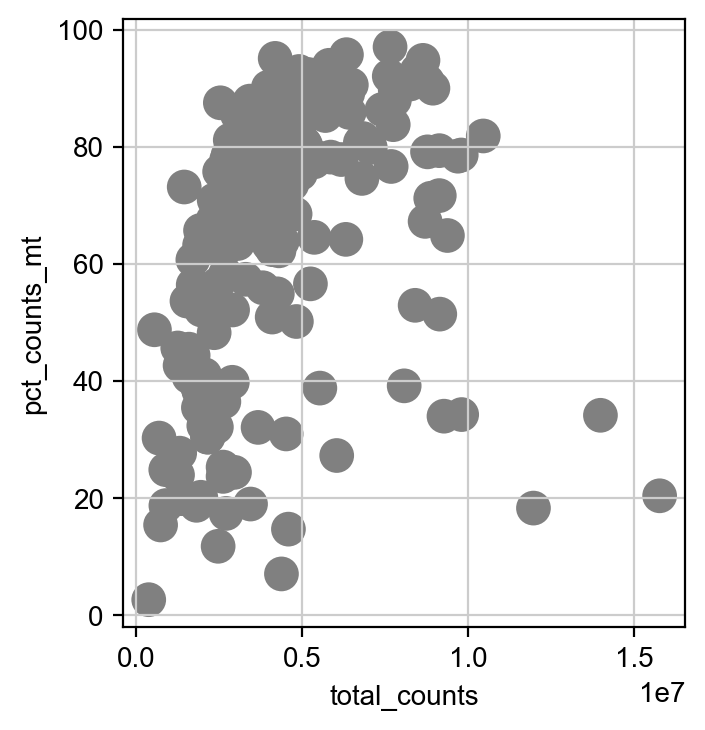

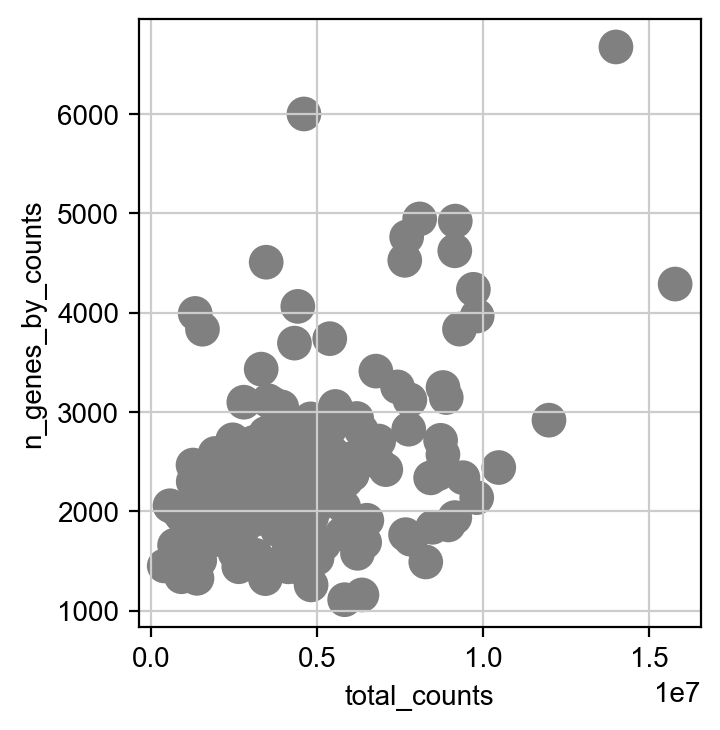

In [33]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

remove cells that have too much mito or could be doublets

In [35]:
#adata = adata[adata.obs.n_genes_by_counts < 8000, :]
#adata = adata[adata.obs.total_counts < 100000, :]
#adata = adata[adata.obs.pct_counts_mt < 20, :]

save post QC scanpy

In [36]:
adata

AnnData object with n_obs × n_vars = 192 × 11932
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [37]:
resultsFileQC

'write/Ayyaz_intestine_QC.h5ad'

In [38]:
adata.write(resultsFileQC)

# Analysis

In [39]:
resultsFile = writeDir + fileName + '.h5ad'       # final output
resultsFileQC = writeDir + fileName + '_QC.h5ad'  # post QC (pre-analysis) 

Set figure parameters

In [40]:
sc.set_figure_params(scanpy=True, dpi=100, dpi_save=150, fontsize=10, format='png')
sc.settings.figdir = "figures/" + fileName + "/"
figName = fileName

In [41]:
adata = sc.read(resultsFileQC)
adata

/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 192 × 11932
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [42]:
sc.pp.normalize_total(adata,target_sum=1e4)

normalizing counts per cell
    finished (0:00:00)


In [43]:
sc.pp.log1p(adata)

In [44]:
sc.pp.highly_variable_genes(adata)#, flavor = "seurat", n_top_genes=2000)

extracting highly variable genes


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:216: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


extracting highly variable genes


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:216: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
2192


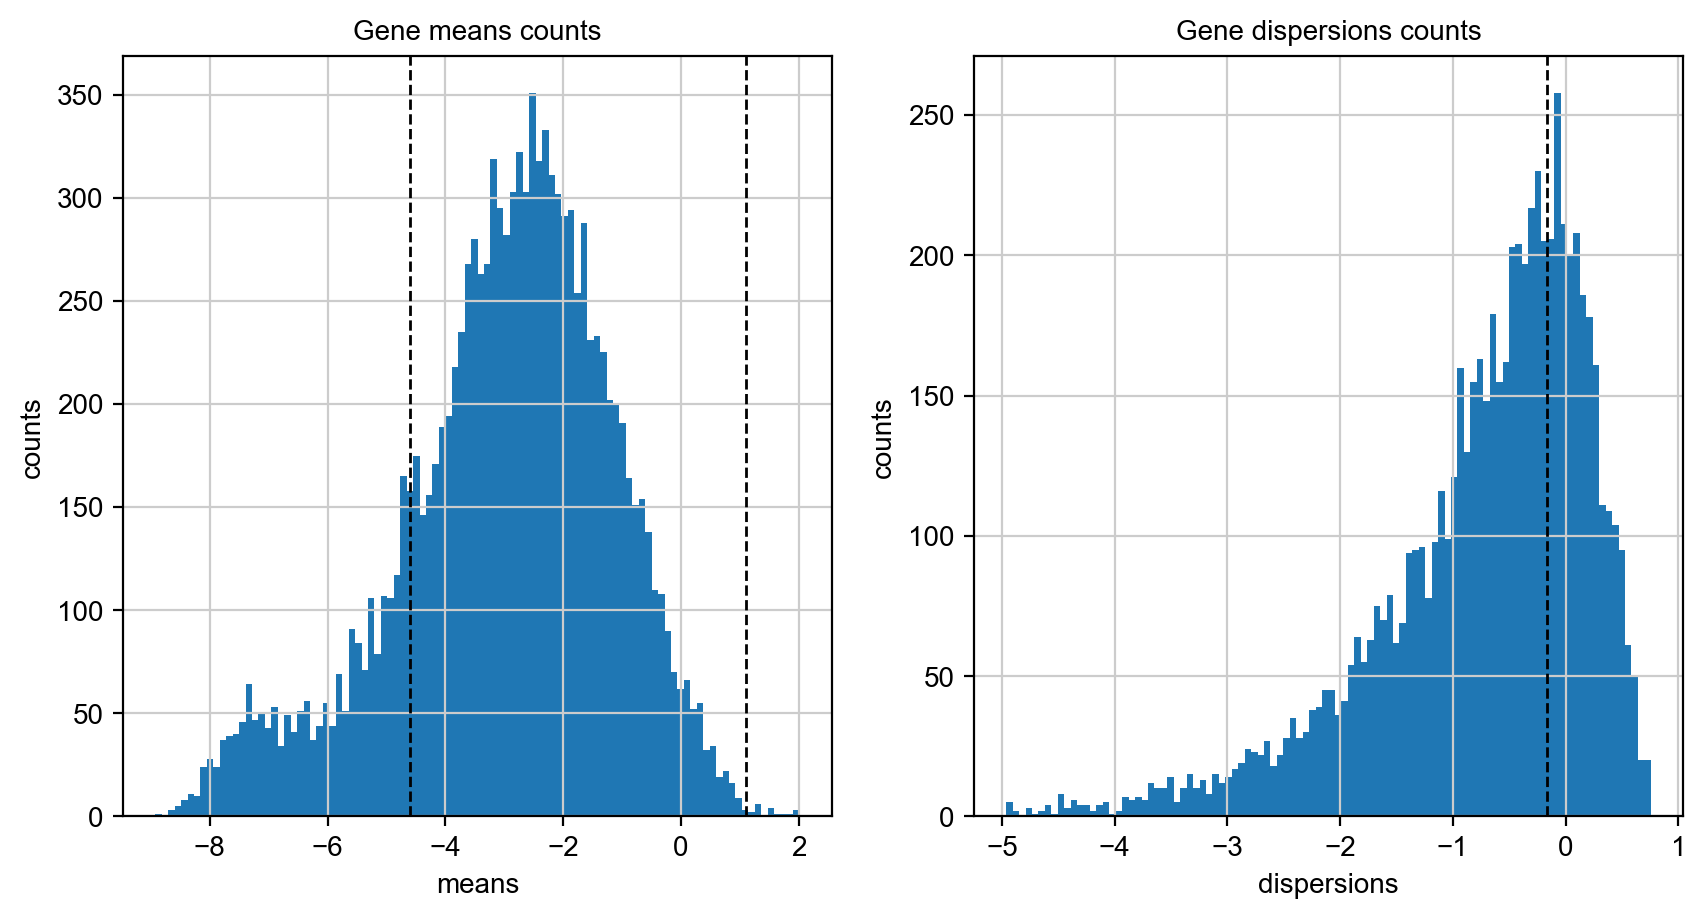

In [50]:
minMean = 0.01
maxMean = 3
minDisp = 0.85

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

means = adata.var[["means"]][adata.var[["means"]] > np.exp(-14)]#adata.var[["means"]],
axs[0].hist(np.log(means), bins=100)#, log=True),
axs[0].axvline(np.log(minMean), color='k', linestyle='dashed', linewidth=1)
axs[0].axvline(np.log(maxMean), color='k', linestyle='dashed', linewidth=1)
axs[0].set_title('Gene means counts')
axs[0].set_xlabel('means')
axs[0].set_ylabel('counts')

dispNorm = adata.var[["dispersions_norm"]][adata.var[["dispersions_norm"]] > np.exp(-5)]#adata.var[["means"]],
axs[1].hist(np.log(dispNorm), bins=100)#, log=True),
axs[1].axvline(np.log(minDisp), color='k', linestyle='dashed', linewidth=1)
axs[1].set_title('Gene dispersions counts')
axs[1].set_xlabel('dispersions')
axs[1].set_ylabel('counts')

sc.pp.highly_variable_genes(adata, min_disp=minDisp, min_mean=minMean, max_mean=maxMean)
print(sum(adata.var.highly_variable))

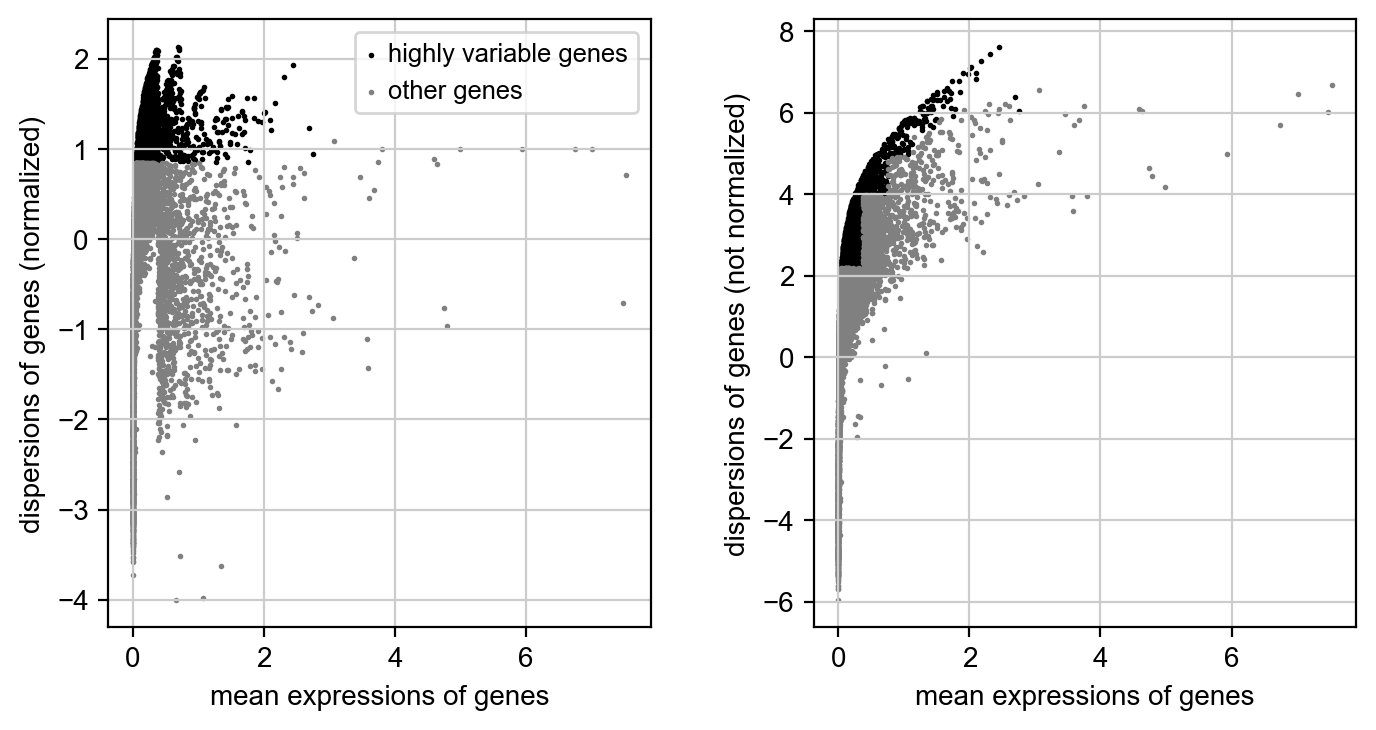

In [51]:
sc.pl.highly_variable_genes(adata)

In [52]:
#for inGene in adata.var[-8:].index.tolist():
#    adata.var.loc[inGene,"highly_variable"] = False

In [53]:
adata.raw = adata

In [54]:
#adata = adata[:, adata.var.highly_variable]
adata = adata[:, np.logical_and(adata.var.highly_variable, np.logical_not(adata.var.mt))]

In [55]:
#sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

In [56]:
#sc.pp.scale(adata, max_value=10)

In [57]:
sc.tl.pca(adata, n_comps = 100, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=100
    finished (0:00:00)


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca


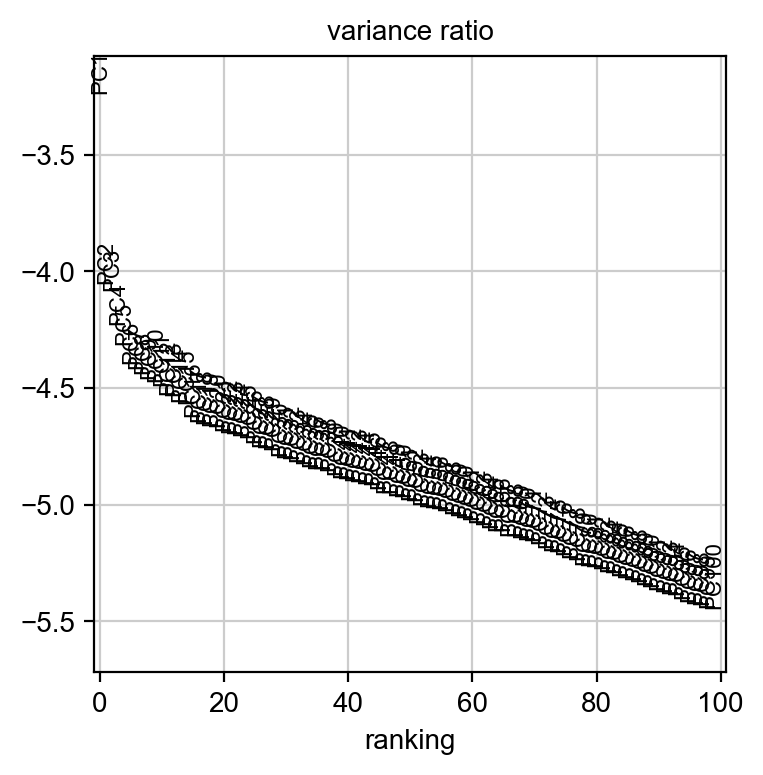

In [58]:
sc.pl.pca_variance_ratio(adata, n_pcs = 100, log=True)

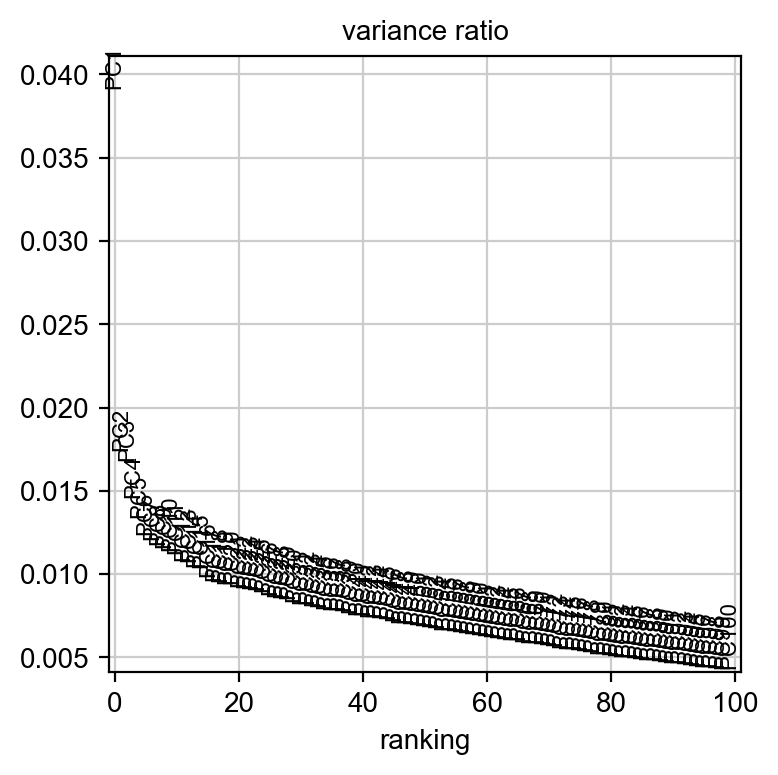

In [59]:
sc.pl.pca_variance_ratio(adata, n_pcs = 100)

In [60]:
sc.pp.neighbors(adata, n_neighbors=20, n_pcs=40)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)


In [61]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:00)


In [62]:
sc.tl.leiden(adata, resolution=0.25)

running Leiden clustering
    finished: found 1 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


In [63]:
adata.obs

,n_genes,n_genes_by_counts,total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,pct_counts_mt,leiden
A01__Plate3,2556,2384,1604401.0,91.704256,96.936801,98.477126,99.501808,699629.0,43.606865,0
A01__Plate4,2077,1914,2917099.0,74.271734,82.514478,90.898800,98.936546,1520051.0,52.108311,0
A02__Plate3,2660,2457,2076356.0,93.354174,96.887239,98.422380,99.551426,852078.0,41.037182,0
A02__Plate4,1668,1500,2735272.0,93.761315,97.640710,99.380062,99.916206,2124612.0,77.674614,0
A03__Plate3,2666,2465,1259242.0,86.891638,93.172321,96.529738,99.145121,301160.0,23.915976,0
...,...,...,...,...,...,...,...,...,...,...
H10__Plate4,2837,2390,2330909.0,84.736470,92.466115,97.349918,99.681455,1574036.0,67.528847,0
H11__Plate3,2495,2336,8413494.0,72.092284,80.330514,89.801324,98.901812,4450858.0,52.901424,0
H11__Plate4,3493,3112,3526685.0,80.529704,85.577958,90.781088,96.760244,2324340.0,65.907219,0
H12__Plate3,2047,1958,905593.0,95.163611,97.796471,98.767548,99.483322,224758.0,24.818874,0


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


KeyError: 'label'

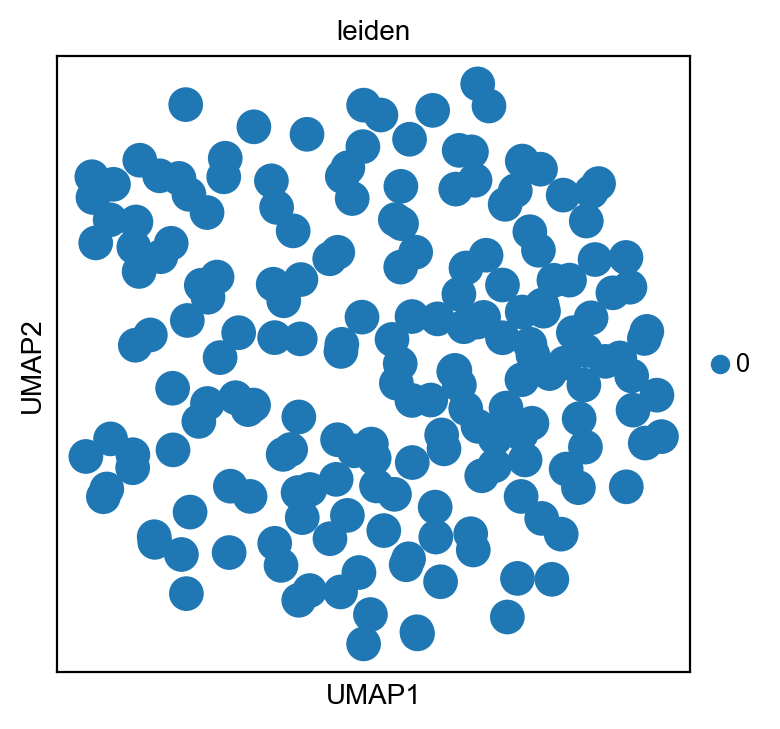

In [65]:
sc.pl.umap(adata, color=["leiden","label"],ncols=2)

In [ ]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon', use_raw=False)
#sc.tl.filter_rank_genes_groups(adata, groupby="leiden", use_raw=False,
#                                   key_added='rank_genes_groups_filtered', 
#                                   min_in_group_fraction=0.25, min_fold_change=1, max_out_group_fraction=0.5, compare_abs=False)
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [ ]:
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(15)

In [ ]:
sc.tl.dendrogram(adata,groupby="leiden", n_pcs=40)
sc.pl.rank_genes_groups_dotplot(adata,n_genes=3)#,key="rank_genes_groups_filtered")

In [ ]:
sigFile = "../mhCompTiss/data/LUAD/humanLUADgeneSig.csv"
sigGenes = pd.read_csv(sigFile)
hpcs = sigGenes["hpcs"]

In [ ]:
sc.tl.score_genes(adata, hpcs, score_name="HPCS_score")

In [ ]:
sc.pl.umap(adata, color=["leiden","HPCS_score","SLC4A11"],ncols=3, cmap="Reds")

In [ ]:
sc.pl.umap(adata, color=["HPCS_score","Plaur", "Procr", "F2r", 
                         "Slc4a11", "Itga2", "Cldn4","revSC_score"],ncols=4, cmap="Reds")

In [ ]:
resultsFile

In [66]:
adata.write(resultsFile)
adata

AnnData object with n_obs × n_vars = 6346 × 1861
    obs: 'sample', 'cell_type', 'complexity', 'n_genes', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'patient', 'HPCS_score'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'patient_colors', 'rank_genes_groups', 'dendrogram_leiden'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_

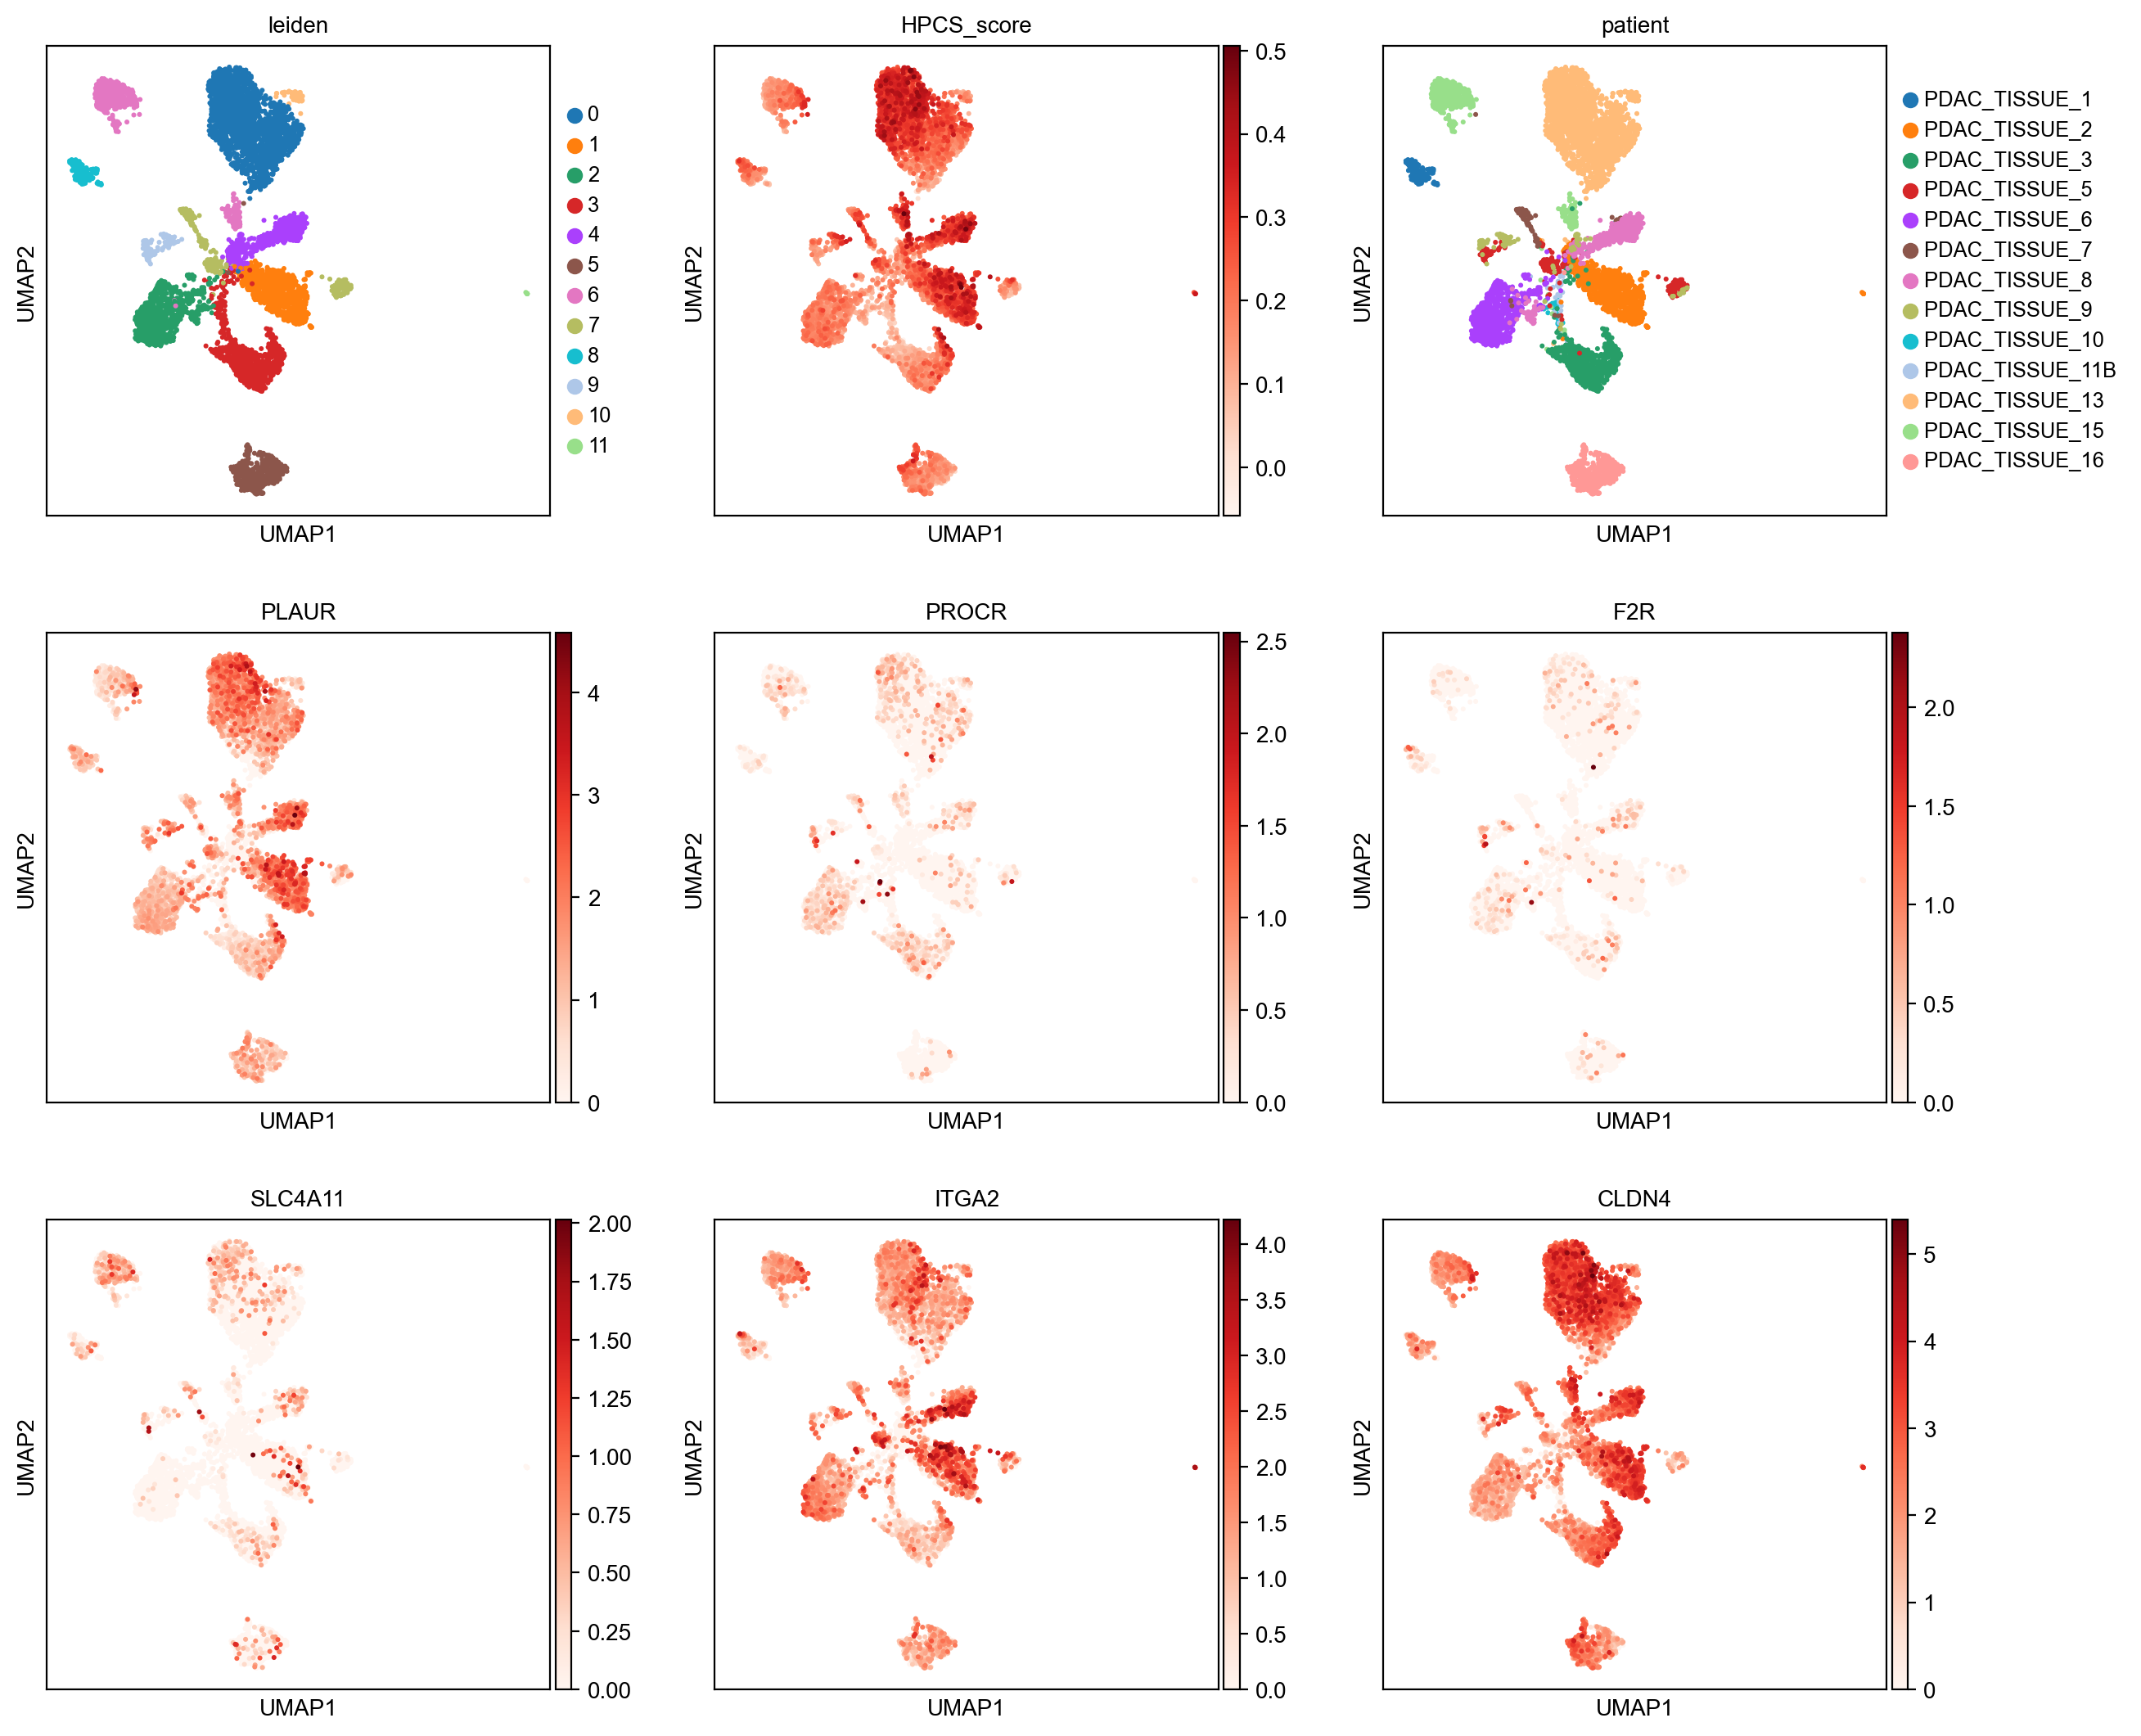

In [1]:
import scanpy as sc
writeDir = "write/"
fileName = "Steele2020_Pancreas"
resultsFile = writeDir + fileName + '.h5ad' 
adata = sc.read_h5ad(resultsFile)
sc.set_figure_params(scanpy=True, dpi=100, dpi_save=150, fontsize=10, format='png')
sc.pl.umap(adata, color=["leiden","HPCS_score","patient","PLAUR", "PROCR", "F2R", "SLC4A11", "ITGA2", "CLDN4"],ncols=3, cmap="Reds")


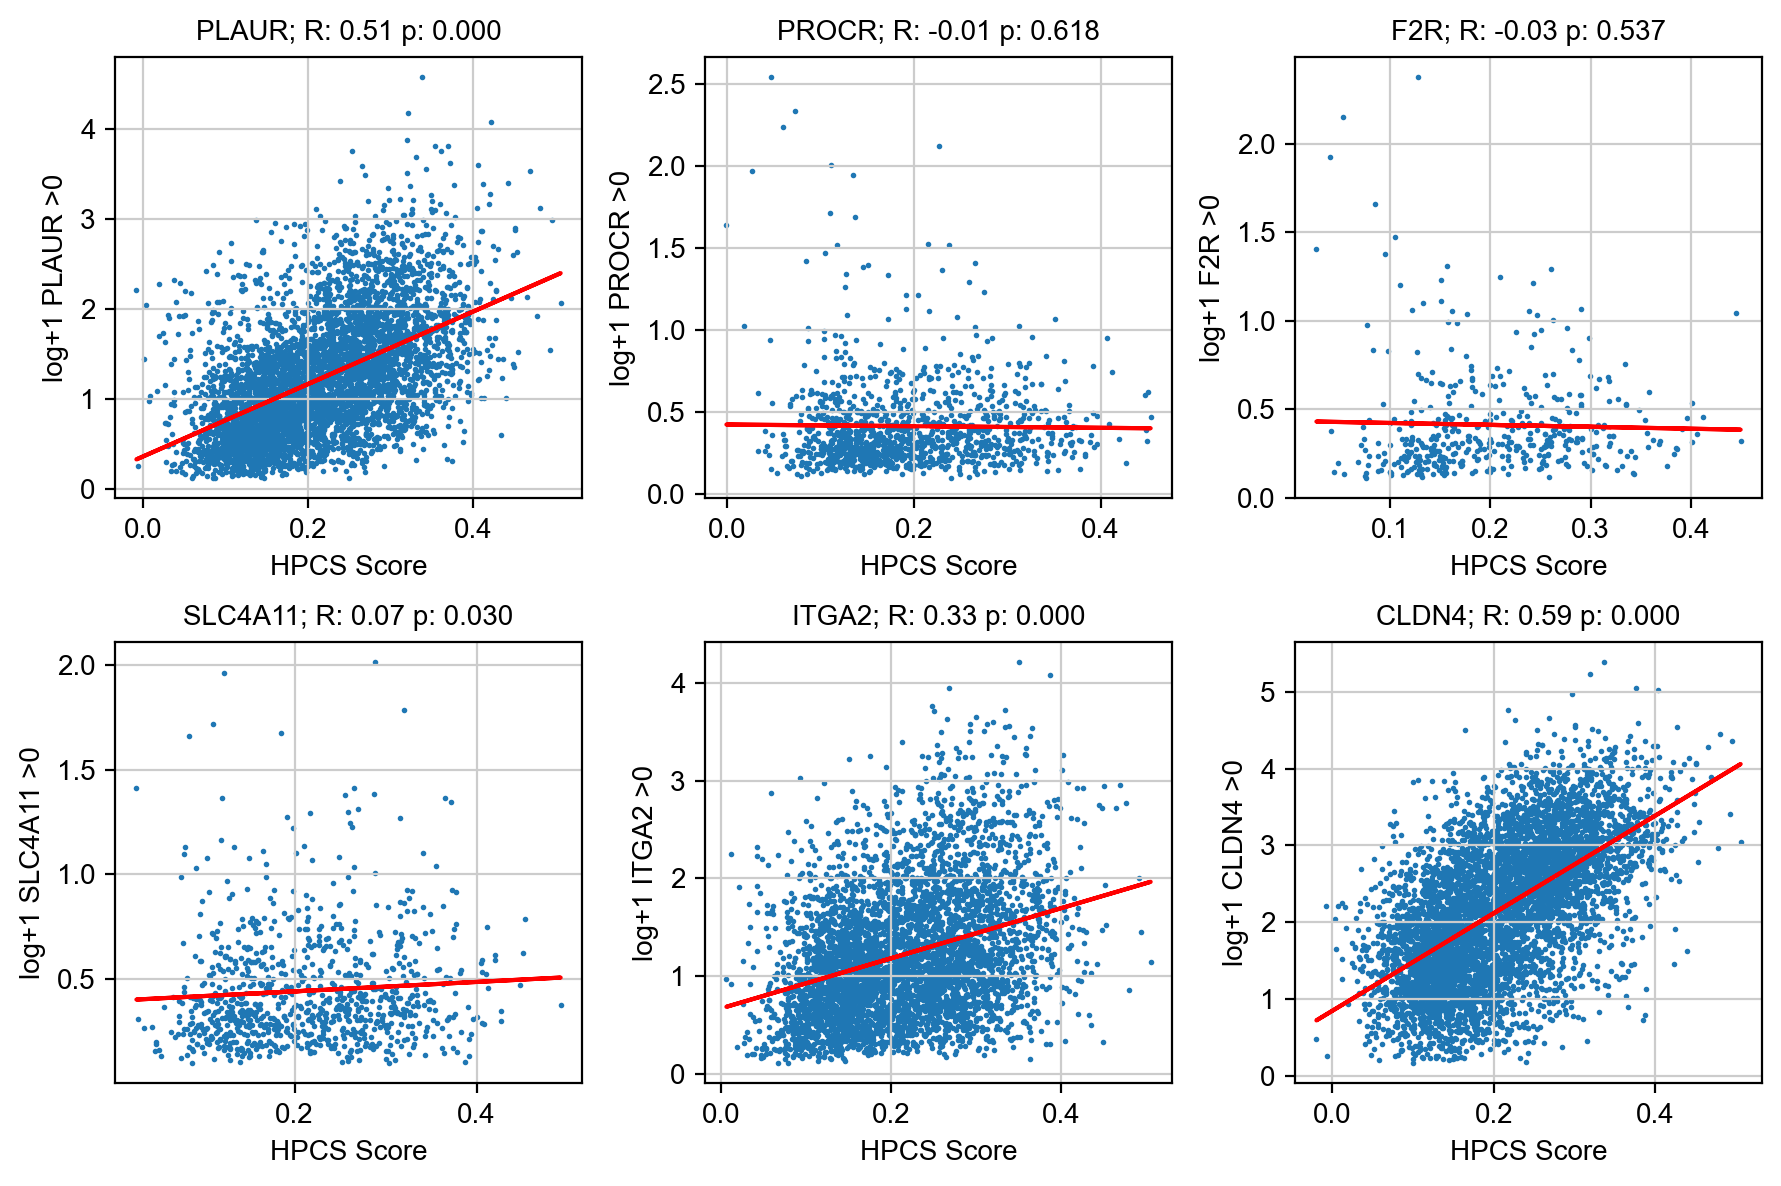

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import linregress

adatar = adata.raw.to_adata()

def plotExpvScore(gene, ax):
    geneExpr = np.array(adatar[:,adatar.var_names==gene].X.todense().flatten())[0]
    
    x = adata.obs.HPCS_score.values[geneExpr>0]
    y = geneExpr[geneExpr>0]
    
    # Fit linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    #print(slope, intercept, r_value, p_value, std_err)
    
    # Calculate confidence interval
    confidence_interval = 1.96 * std_err  # 95% confidence interval
    
    # Create scatter plot
    ax.scatter(x, y, label="Data points", s=1)
    
    # Plot regression line
    ax.plot(x, slope * x + intercept, color='red', label="Regression line")
    
    ## Plot confidence interval
    #ax.fill_between(x, slope * x + intercept - confidence_interval, slope * x + intercept + confidence_interval, color='blue', alpha=0.3, label="Confidence interval")
    
    # Add labels and title
    ax.set_title(f"{gene}; R: {r_value:.2f} p: {p_value:.3f}")
    ax.set_xlabel("HPCS Score")
    ax.set_ylabel(f"log+1 {gene} >0")

    return(r_value)

genes = ["PLAUR", "PROCR", "F2R", "SLC4A11", "ITGA2", "CLDN4"]
rvals = np.zeros(len(genes))
fig, axs = plt.subplots(2,3, figsize=(9,6))

for i,ax in enumerate(axs.flatten()):
    rvals[i] = plotExpvScore(genes[i], ax)

fig.tight_layout()

pd.DataFrame(rvals, index=genes, columns=[fileName]).to_csv(f"{writeDir}/hpcsCorr/{fileName}_GeneRs.csv")